In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [5]:
base_dir = 'C:/Users/ferdi/Desktop/Image Processing/proje/fasulye' 
train_dir = os.path.join(base_dir, 'train') 

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [122]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [123]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [124]:
base_model.trainable = False

In [125]:
from tensorflow.keras.layers import BatchNormalization

x = BatchNormalization()(x)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Yeni katmanlar ekleyin
predictions = Dense(3, activation='softmax')(x)  # 3 sınıfınız varsa


In [126]:
model = Model(inputs=base_model.input, outputs=predictions)

In [127]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [128]:
history4 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,epochs=40)

Epoch 1/40


C:\Users\ferdi\anaconda3\envs\bitirme_2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 319ms/step - accuracy: 0.5348 - loss: 1.4193
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6250 - loss: 0.3687
Epoch 3/40


C:\Users\ferdi\anaconda3\envs\bitirme_2\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - accuracy: 0.8202 - loss: 0.4543
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7500 - loss: 0.2614
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.8587 - loss: 0.4012
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8125 - loss: 0.2145
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.8567 - loss: 0.3550
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.8750 - loss: 0.1885
Epoch 9/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.8425 - loss: 0.3725
Epoch 10/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.8750 - loss: 0.1023
Epoch 11/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step - accuracy: 0.8801 - loss: 0.3120
Epoch 12/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8750 - loss: 0.1254
Epoch 13/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - accuracy: 0.8912 - loss: 0.3346
Epoch 14/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - 

In [129]:
histories = [history, history4]
history_labels = ['Model 1', 'Model 5']

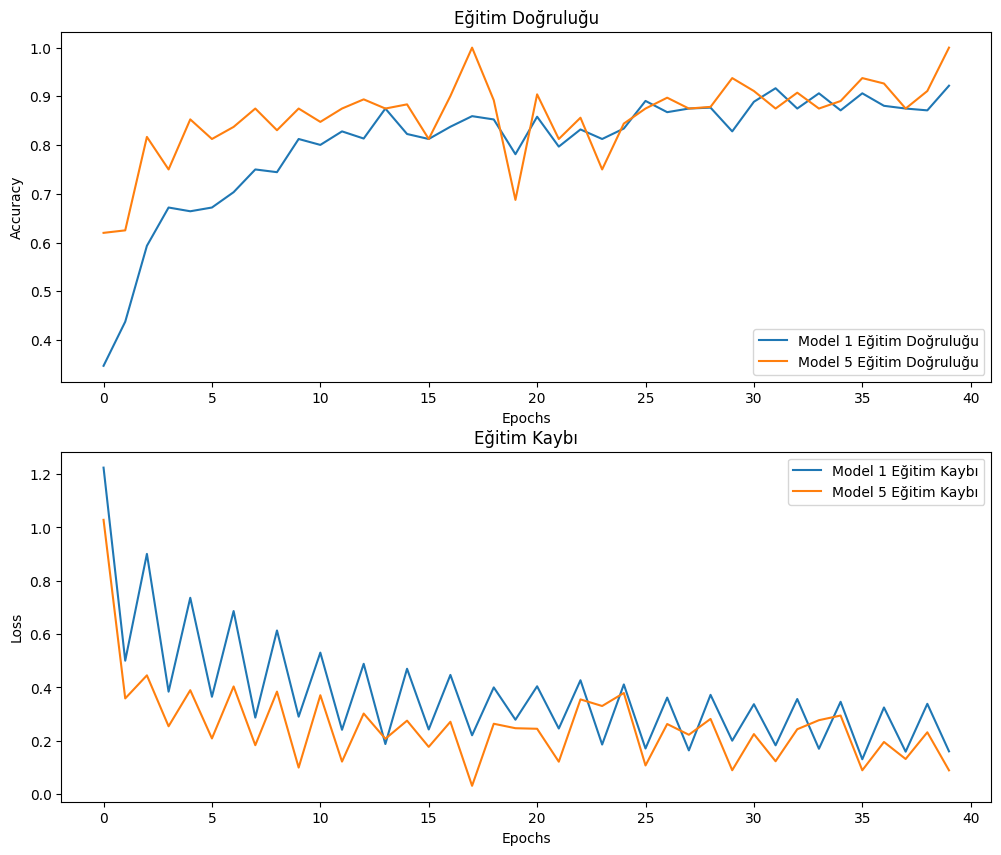

In [130]:
#Toplu Grafik Çizdirme

plt.figure(figsize=(12, 10))
        # Accuracy plot
plt.subplot(2, 1, 1)
for history, label in zip(histories, history_labels):
    acc = history.history['accuracy']
    plt.plot(acc, label=f'{label} Eğitim Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

    # Loss plot
plt.subplot(2, 1, 2)
for history, label in zip(histories, history_labels):
    loss = history.history['loss']
    plt.plot(loss, label=f'{label} Eğitim Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
    
plt.show()

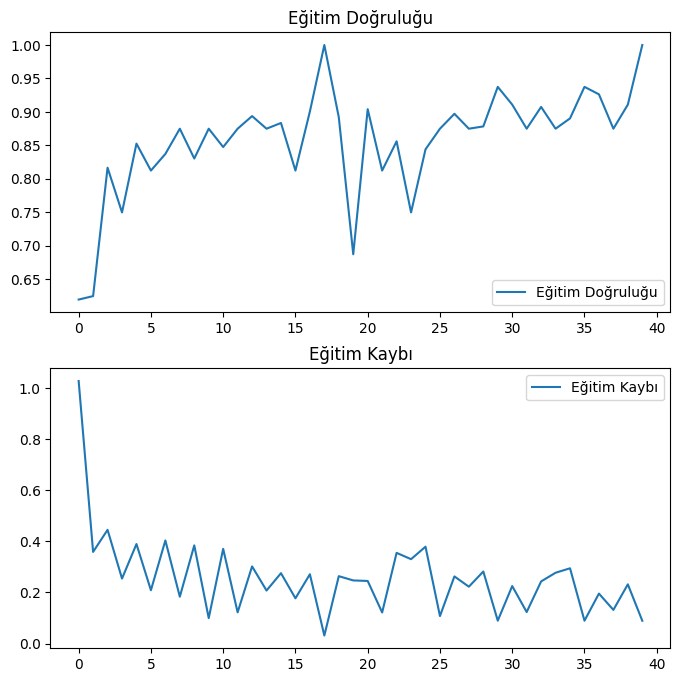

In [133]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Eğitim Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim Doğruluğu')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Eğitim Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim Kaybı')
plt.show()


In [134]:
test_dir=os.path.join(base_dir, 'val') 

In [136]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Test veri setinin klasör yolu
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 96 images belonging to 3 classes.


In [137]:
predictions = model.predict(test_generator, steps=test_generator.samples//test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step


In [138]:
print(len(predicted_classes))

96


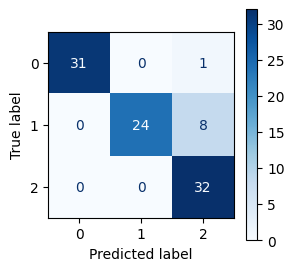

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix hesaplama
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(3))  # 10 sınıf var

# Confusion matrix çizdirme
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(3))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [140]:
from sklearn.metrics import classification_report
import pandas as pd

# Modelin sınıflandırma raporunu al
report = classification_report(true_classes, predicted_classes, labels=np.arange(3), output_dict=True)

# F1 skorlarını bir DataFrame'e dönüştür
f1_scores = pd.DataFrame(report).transpose()

# F1 skorlarını çıktı olarak göster
print(f1_scores[['f1-score']])

              f1-score
0             0.984127
1             0.857143
2             0.876712
accuracy      0.906250
macro avg     0.905994
weighted avg  0.905994


In [74]:
model.save('modelfasulye_v3.0.0.h5')

In [75]:
model.save('modelfasulye_v3.0.0.keras')

In [21]:
keras.saving.save_model(model, 'model_v1.0.1.keras')

NameError: name 'keras' is not defined

In [23]:
img_path='tomato/val/Tomato___Bacterial_spot/0ab54691-ba9f-4c1f-a69b-ec0501df4401___GCREC_Bact.Sp 3170.jpg'

In [27]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


# Tahmin yap
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]  # İlk üç tahmini al

# Tahminleri yazdır
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


NameError: name 'decode_predictions' is not defined

In [25]:
from tensorflow.keras.preprocessing import image